In [1]:
#lancer la communication asynchrone avec thymio
from tdmclient import ClientAsync, aw
client = ClientAsync()
node = await client.wait_for_node()
await node.lock()

#!pip install pyvisgraph
#!pip install geopandas
#!pip install matplotlib

Node eb16048f-962c-44b2-9651-cc3b67bca83b

In [3]:
!pip install geopandas

  Using cached geopandas-0.10.2-py2.py3-none-any.whl (1.0 MB)
  Using cached Fiona-1.8.20.tar.gz (1.3 MB)


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\theoh\anaconda3\python.exe' -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\theoh\\AppData\\Local\\Temp\\pip-install-k5rw1ynu\\fiona\\setup.py'"'"'; __file__='"'"'C:\\Users\\theoh\\AppData\\Local\\Temp\\pip-install-k5rw1ynu\\fiona\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' egg_info --egg-base 'C:\Users\theoh\AppData\Local\Temp\pip-pip-egg-info-lw8khdcr'
         cwd: C:\Users\theoh\AppData\Local\Temp\pip-install-k5rw1ynu\fiona\
    Complete output (1 lines):
    A GDAL API version must be specified. Provide a path to gdal-config using a GDAL_CONFIG environment variable or use a GDAL_VERSION environment variable.
    ----------------------------------------
ERROR: Command errored out with exit status 1: python setup.py egg_info Check the logs for full command out

In [1]:
import numpy as np
import pyvisgraph as vg
import math
import geopandas as gpd
from geopandas import GeoSeries
from shapely.geometry import Polygon, Point, LineString
import control as ctrl
import Global as glob

ModuleNotFoundError: No module named 'geopandas'

In [71]:
# Defining example variables given by vision module
p1 = [(1, 0.5), (2, 0.5), (2, 1.5), (1, 1.5)]
#p2 = [(3, 0), (4, 0), (5, 2), (5, 4), (3, 3)]
p3 = [(3, 3), (4, 3), (4, 4), (3, 4)]
#p1=[(2,-3), (4,-3), (4,1), (2,1)]

list_obstacles=[p1,p3]
start=[0.0,0.0]
end=[4.5, 3.5]

#variables definition needed
margin=0.2

#transforming arrays of coord to polygon
g=glob.obstacles_to_polygons(list_obstacles)

0    POLYGON ((1.00000 0.50000, 2.00000 0.50000, 2....
1    POLYGON ((3.00000 3.00000, 4.00000 3.00000, 4....
dtype: geometry


<AxesSubplot:>

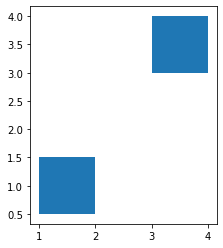

In [72]:
#visualizing the polygons
print(g)
g.plot()

In [73]:
#add the margin
glob.polygons_add_margin(g,margin)

0    POLYGON ((0.80000 0.30000, 0.80000 1.70000, 2....
1    POLYGON ((2.80000 2.80000, 2.80000 4.20000, 4....
dtype: geometry

0    POLYGON ((1.00000 0.50000, 2.00000 0.50000, 2....
1    POLYGON ((3.00000 3.00000, 4.00000 3.00000, 4....
dtype: geometry


<AxesSubplot:>

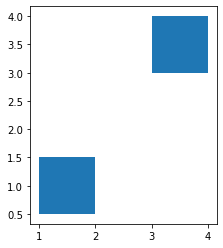

In [74]:
#visualizing the polygons with the margin
print(g)
g.plot()

In [75]:
#computing the optimal path using Visibility Graph algorithm
visgraph=glob.polygons_to_VisibilityGraph(g)
glob.save_VisibilityGraph(visgraph,'visgraph_1')

shortest_path=glob.VisibilityGraph_shortest_path(visgraph,start,end)

distance=glob.path_distance(shortest_path)

100%|██████████| 1/1 [00:00<00:00, 371.05it/s]


 Visibility graph input:  [[Point(1.00, 0.50), Point(2.00, 0.50), Point(2.00, 1.50), Point(1.00, 1.50)], [Point(3.00, 3.00), Point(4.00, 3.00), Point(4.00, 4.00), Point(3.00, 4.00)]] 

Shortest path distance: 5.863984385168227 



0    POINT (0.00000 0.00000)
1    POINT (1.00000 1.50000)
2    POINT (4.00000 3.00000)
3    POINT (4.50000 3.50000)
dtype: geometry 

0    POLYGON ((1.00000 0.50000, 2.00000 0.50000, 2....
1    POLYGON ((3.00000 3.00000, 4.00000 3.00000, 4....
0                              POINT (0.00000 0.00000)
1                              POINT (1.00000 1.50000)
2                              POINT (4.00000 3.00000)
3                              POINT (4.50000 3.50000)
dtype: geometry 



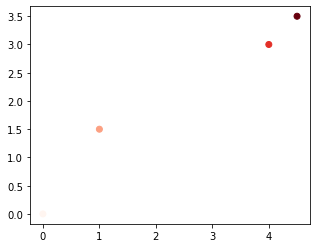

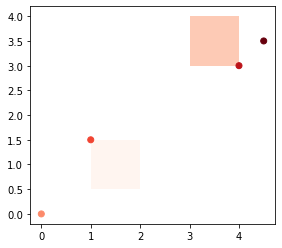

In [76]:
#convertit le shortest path en geometric pour pouvoir etre visualisé (vision)
path=glob.ShortestPath_to_geometric(shortest_path)

#ajoute a g le chemin
g=g.geometry.append(path.geometry)

glob.plot_geometric_data(path)
glob.plot_geometric_data(g)

In [77]:
#converting geometric list into vector
#angles=[0,45,0]
start_angle=0
checkpoints=glob.geometric_path_to_vector(path)  #can be accesed via g too

#iterating through checkpoints 
ctrl.globnav(checkpoints,start_angle,node,client)
    

[1.0, 1.5]
[4.0, 3.0]
[4.5, 3.5]
